#### Installing Required Libraries For Diffusion Models

In [1]:
!pip install -q -U pyarrow==14.0.1 torch==2.3.1 torchaudio==2.3.1 gcsfs==2024.3.1 accelerate==0.33.0 torchvision==0.18.1 transformers==4.44.0 pytorch-fid==0.3.0 datasets==2.19.2 diffusers==0.30.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7

#### Install required library for Gradio

In [2]:
!pip install -q -U gradio==4.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00


#### Training Configuration setup

In [3]:
from dataclasses import dataclass

@dataclass
class TrainingConfig:
    project_name: str = "diffusion-butterflies"  # the name of the project
    logger_name: str | None = None # the logger used by accelerate
    image_size: int = 128  # the generated image resolution
    train_batch_size: int = 16 # the batch size used during training
    eval_batch_size: int = 16  # how many images to sample during evaluation
    num_epochs: int = 50 # total number of training epochs
    dataset_name: str = "huggan/smithsonian_butterflies_subset" # the name of the huggingface repository containing the dataset
    gradient_accumulation_steps: int = 1 # number of steps to accumulate gradients before performing an optimizer step
    learning_rate: float = 1e-4 # the initial learning rate for the optimizer
    lr_warmup_steps: int = 500 # the number of steps to warm up the learning rate from 0 to the initial learning rate
    save_image_epochs: int = 5  # the interval (in epochs) at which generated images are saved
    save_model_epochs: int = 5  # the interval (in epochs) at which the model is saved
    mixed_precision: str = "fp16"  # the precision type for training; "no" for float32, "fp16" for mixed precision
    output_dir: str = "ddpm-butterflies-128"  # the directory where model outputs (images, checkpoints) are saved
    overwrite_output_dir: bool = True  # overwrite the output directory if it already exists
    seed: int = 0  # the seed for random number generation to ensure reproducibility

config = TrainingConfig()


#### Loading the butterfly image dataset from Huggingface and visualizing the content

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['image_url', 'image_alt', 'id', 'name', 'scientific_name', 'gender', 'taxonomy', 'region', 'locality', 'date', 'usnm_no', 'guid', 'edan_url', 'source', 'stage', 'image', 'image_hash', 'sim_score'],
    num_rows: 1000
})


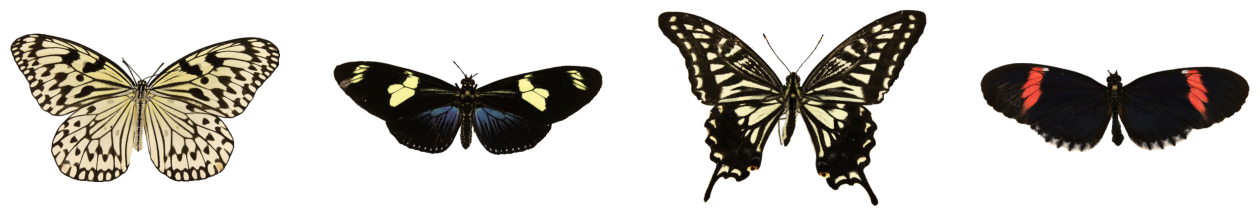

In [4]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import logging

logging.getLogger("datasets").setLevel(logging.ERROR)  # or logging.CRITICAL
dataset = load_dataset(config.dataset_name, split="train")
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()

print(dataset)
fig.show()

#### Create the preprocessing pipeline of the images

In [5]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

#### Save reference images for computing the FID metric

In [6]:
import os
from PIL import Image
from diffusers.utils import make_image_grid
from typing import List

def save_grid_image(images: List[Image.Image], rows: int, cols: int, output_path: str) -> None:
    """
    Creates a grid of images, resizes the grid, and saves it to the specified output path.
    Args:
        images (List[Image.Image]): A list of PIL Image objects to be arranged in a grid.
        rows (int): The number of rows in the image grid.
        cols (int): The number of columns in the image grid.
        output_path (str): The file path where the resulting grid image will be saved.

    """
    grid = make_image_grid(images, rows=rows, cols=cols)
    new_width = grid.width // 2
    new_height = grid.height // 2
    grid = grid.resize((new_width, new_height), Image.LANCZOS)
    grid.save(output_path)

# save images individually for computing the FID
reference_images_dir = "reference_images"
os.makedirs(reference_images_dir, exist_ok=True)
reference_images_dataset = dataset.select(range(16))
dataset = dataset.select(range(16, len(dataset)))
images = []
for idx, example in enumerate(reference_images_dataset):
    image = example['image'].convert("RGB")
    image = preprocess(image)
    image = transforms.ToPILImage()(image)
    images.append(image)
    image.save(os.path.join(reference_images_dir, f"{idx}.png"))

# save images as grid for visualisation
reference_grid_path = os.path.join(reference_images_dir, "reference_image_grid.png")
save_grid_image(images, rows=4, cols=4, output_path=reference_grid_path)

#### Transform all the images in the dataset using the preprocessing pipeline

In [7]:
from typing import Dict, List
from PIL import Image

def transform(examples: Dict[str, List[Image.Image]]) -> Dict[str, List[Image.Image]]:
    """
    Applies preprocessing to a list of images by converting them to RGB, resizing,
    flipping, converting to tensor, and normalizing.

    Args:
        examples (Dict[str, List[Image.Image]]): A dictionary containing a list of images
                                                 under the key "image".

    Returns:
        Dict[str, List[Image.Image]]: A dictionary containing the preprocessed images
                                      under the key "images".
    """
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

#### Adding noise to our dataset

Diffusion models are based on the idea of adding random noise to images, step by step. The model is afterwards trained to learn how to undo this process—taking a noisy image and slowly removing the noise to get back to the original image. In this cell, we're going to take a look at how this works by adding noise to an image from our dataset. These noisy images will be the starting point from which the model will eventually generate new, clean ones.

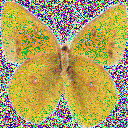

In [8]:
import torch
from PIL import Image
from diffusers import DDPMScheduler

def add_noise(images, noise_scheduler, timesteps):
    """
    Adds noise to the given images using the specified noise scheduler and timesteps.

    Args:
        images (torch.Tensor): The input images to which noise will be added.
        noise_scheduler: The noise scheduler that determines the noise level.
        timesteps (torch.Tensor): The timesteps at which noise is added.

    Returns:
        Tuple[torch.Tensor, torch.Tensor]: A tuple containing the noisy images and the noise added.
    """
    # Generate random noise with the same shape as the images
    noise = torch.randn(images.shape, device=images.device, dtype=images.dtype)

    # Add noise to the images using the noise scheduler
    noisy_images = noise_scheduler.add_noise(images, noise, timesteps)

    return noisy_images, noise

# select the first image from the dataset and add a batch dimension
sample_image = dataset[0]["images"].unsqueeze(0)

# initialize the noise scheduler with 1000 timesteps
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

# specify the timestep at which noise is added (e.g., at step 50)
timesteps = torch.LongTensor([50])

# add noise to the sample image using the noise scheduler
noisy_image, noise = add_noise(sample_image, noise_scheduler, timesteps)

# convert the noisy image back to a PIL Image for visualization
Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])

#### Configuring the DataLoader, UNet Model, Optimizer, and Learning Rate Scheduler for the Diffusion Model

In [9]:
from diffusers import UNet2DModel
import torch
from diffusers.optimization import get_cosine_schedule_with_warmup

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)
model = UNet2DModel(
    sample_size=config.image_size,  # the target image resolution
    in_channels=3,  # the number of input channels, 3 for RGB images
    out_channels=3,  # the number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channels for each UNet block
    down_block_types=(
        "DownBlock2D",  # a regular ResNet downsampling block
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",  # a regular ResNet upsampling block
        "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)
optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)
lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs),
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

#### Define Function to Track Key Metrics

In [20]:
def track_metrics_per_epoch(fid_value, epoch):
  # append the FID value and epoch number to the respective lists for tracking
  fid_values.append(fid_value)
  epochs.append(epoch)

def track_metrics_per_step(metrics, global_step):
  # append the lr, loss value and step number to the respective lists for tracking
  lr_values.append(metrics["lr"])
  loss_values.append(metrics["loss"])
  steps.append(metrics["step"])



#### Evaluating the Model and Calculating FID Score


In [21]:
from diffusers import DDPMPipeline
from diffusers.utils import make_image_grid
from pytorch_fid import fid_score
from typing import Any
import os


def evaluate(config: Any, epoch: int, pipeline: Any, global_step: int) -> None:
    """
    Evaluates the model by generating images, saving them, and computing the FID score.

    Args:
        config (Any): The configuration object containing various parameters for training and evaluation.
        epoch (int): The current epoch number during training.
        pipeline (Any): The image generation pipeline ( the diffusion model )
        global_step (int): The current step number in the training process.
    """

    # generate images using the model pipeline
    generated_images = pipeline(
        batch_size=config.eval_batch_size,
        generator=torch.Generator(device='cpu').manual_seed(config.seed),
    ).images

    # save the images individually
    test_dir = os.path.join(config.output_dir, "samples")
    os.makedirs(test_dir, exist_ok=True)
    generated_image_dir = os.path.join(test_dir, f"generated_epoch_{epoch}")
    os.makedirs(generated_image_dir, exist_ok=True)
    for idx, img in enumerate(generated_images):
        img.save(os.path.join(generated_image_dir, f"{idx}.png"))

    # save the image grid
    generated_grid_path = f"{test_dir}/{epoch:04d}.png"
    save_grid_image(generated_images, rows=4, cols=4, output_path=generated_grid_path)

    # compute the FID value using the reference images and the generated images
    fid_value = fid_score.calculate_fid_given_paths(
        [reference_images_dir, generated_image_dir],
        batch_size=config.eval_batch_size,
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
        dims=2048,
    )
    # Store epoch and fid value measured
    track_metrics_per_epoch(fid_value,epoch)

#### Diffusion Model Training Loop


In [12]:
from accelerate import Accelerator
from huggingface_hub import create_repo, upload_folder
from tqdm.auto import tqdm
from pathlib import Path
import os
import torch.nn.functional as F
from typing import Any

def train_loop(
    config: Any,
    model: torch.nn.Module,
    noise_scheduler: Any,
    optimizer: torch.optim.Optimizer,
    train_dataloader: torch.utils.data.DataLoader,
    lr_scheduler: Any
) -> None:
    """
    The main training loop for the diffusion model.

    Args:
        config (Any): Configuration object containing various parameters for training.
        model (torch.nn.Module): The model to be trained.
        noise_scheduler (Any): Scheduler for adding noise during the forward diffusion process.
        optimizer (torch.optim.Optimizer): The optimizer used for training the model.
        train_dataloader (torch.utils.data.DataLoader): The dataloader providing training batches.
        lr_scheduler (Any): Learning rate scheduler to adjust the learning rate during training.

    """
    # initialize the accelerator for distributed or mixed-precision training
    accelerator = Accelerator(
        mixed_precision=config.mixed_precision,
        gradient_accumulation_steps=config.gradient_accumulation_steps,
        log_with=config.logger_name,
        project_dir=os.path.join(config.output_dir, "logs"),
    )

    # set up tracking if this is the main process
    if accelerator.is_main_process:
        if config.output_dir is not None:
            os.makedirs(config.output_dir, exist_ok=True)
        accelerator.init_trackers(config.project_name)

    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )

    global_step = 0

    # training loop over epochs
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader), disable=not accelerator.is_local_main_process)
        progress_bar.set_description(f"Epoch {epoch}")

        # iterate over batches in the dataloader
        for step, batch in enumerate(train_dataloader):
            clean_images = batch["images"]
            bs = clean_images.shape[0]

            # sample a random timestep for each image
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps, (bs,), device=clean_images.device,
                dtype=torch.int64
            )

            # add noise to the clean images according to the noise magnitude at each timestep
            # (this is the forward diffusion process)
            noisy_images, noise = add_noise(clean_images, noise_scheduler, timesteps)
            with accelerator.accumulate(model):
                # predict the noise residual from the noisy images
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)

                # gradient clipping and optimization step
                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()

                # reset gradients for the next step
                optimizer.zero_grad()

            # update progress bar and log the current loss and learning rate
            progress_bar.update(1)
            current_lr = lr_scheduler.get_last_lr()[0]
            metrics = {"loss": loss.detach().item(), "lr": current_lr, "step": global_step}
            track_metrics_per_step(metrics,global_step)
            progress_bar.set_postfix(**metrics)
            global_step += 1

        if accelerator.is_main_process:
            pipeline = DDPMPipeline(unet=accelerator.unwrap_model(model), scheduler=noise_scheduler)

            # evaluate and save images
            if (epoch + 1) % config.save_image_epochs == 0 or epoch == config.num_epochs - 1:
                evaluate(config, epoch, pipeline, global_step)

            # save the model checkpoint
            if (epoch + 1) % config.save_model_epochs == 0 or epoch == config.num_epochs - 1:
                pipeline.save_pretrained(config.output_dir)

#### Define the Gradio Components for the Experimental Tracking Dashboard

In [13]:
from accelerate import notebook_launcher
import pandas as pd
import gradio as gr
import numpy as np
import re
from typing import Tuple


def get_latest_png() -> str | None:
    """
    Finds and returns the latest PNG file containing the generated images by the model in the evaluation phase,
    based on the maximum epoch number in the configuration directory.
    The PNG files are following the naming convention that includes an epoch number, such as 'generated_epoch_0010.png'.

    Returns:
        str | None: The full path to the PNG file with the highest epoch number, or None if the directory does not exist or no PNG files are found.
    """
    # Regular expression to match files like 'generated_epoch_0010.png'
    pattern = re.compile(r"(\d+)\.png$")
    latest_epoch = -1
    latest_file = None
    test_dir = os.path.join(config.output_dir, "samples")

    # Check if the directory exists, if not return None
    if not os.path.exists(test_dir):
        return None

    # Iterate over all files in the directory
    for file_name in os.listdir(test_dir):
        match = pattern.search(file_name)
        if match:
            epoch = int(match.group(1))  # Extract epoch number from file name
            if epoch > latest_epoch:
                latest_epoch = epoch
                latest_file = file_name

    if latest_file:
        return os.path.join(test_dir, latest_file)
    else:
        return None

def get_lr_plot() -> gr.LinePlot:
    """
    Generates a line plot of the learning rate over training steps.

    Returns:
        gr.LinePlot: A Gradio LinePlot component displaying learning rate over steps.
    """
    data = pd.DataFrame({"Steps": steps, "Learning Rate": lr_values})
    plot = gr.LinePlot(
        value=data,
        x="Steps",
        y="Learning Rate",
        title="Learning Rate per Step",
        width=600,
        height=350,
    )
    return plot

def get_loss_plot() -> gr.LinePlot:
    """
    Generates a line plot of the loss over training steps.

    Returns:
        gr.LinePlot: A Gradio LinePlot component displaying loss over steps.
    """
    data = pd.DataFrame({"Steps": steps, "Loss": loss_values})
    plot = gr.LinePlot(
        value=data,
        x="Steps",
        y="Loss",
        title="Loss per Step",
        width=600,
        height=350,
    )
    return plot

def get_fid_plot() -> gr.LinePlot:
    """
    Generates a line plot of the FID score over epochs.

    Returns:
        gr.LinePlot: A Gradio LinePlot component displaying FID score over epochs.
    """
    data = pd.DataFrame({"Epochs": epochs, "FID": fid_values})
    plot = gr.LinePlot(
        value=data,
        x="Epochs",
        y="FID",
        title="FID per Epoch",
        width=600,
        height=350,
    )
    return plot

def get_image_paths() -> Tuple[str, str]:
    """
    Retrieves the paths for the generated and reference image grids.

    Returns:
        Tuple[str, str]: A tuple containing the paths to the generated and reference image grids.
    """
    return get_latest_png(), reference_grid_path



#### Initializing Metrics and Creating Gradio Interface


The FID (Fréchet Inception Distance) score is a widely used metric to evaluate the quality of generated images by comparing them to a set of real images. It measures how close the generated images are to the real ones in terms of their feature distributions. A lower FID score indicates that the generated images are more similar to the real images, generally reflecting better quality.

Visualizing the images used in the FID calculation can make this metric more intuitive. By comparing the generated images with the reference (real) images side by side, you can better understand what the FID score represents. If the images look very different, it makes sense that the FID score would be higher. Conversely, if they appear quite similar, a lower FID score would confirm that the model is performing well. This visual approach helps make the FID score more meaningful and provides insight into what the model is learning.

This is why we added two extra views to the dashboard: one displaying a grid of reference images and the other showing a grid of generated images. By having both sets of images visible, you can easily compare them and get a clearer picture of how well the model is performing, directly in line with the FID score.


In [23]:
# initialize the metrics
lr_values = []
loss_values = []
fid_values = []
steps = []
epochs = []

# create the Gradio interface for displaying plots and images
with gr.Blocks() as demo:
    # row for learning rate plot
    with gr.Row():
        lr_plot = gr.LinePlot()

    # row for loss plot
    with gr.Row():
        loss_plot = gr.LinePlot()

    # row for FID plot
    with gr.Row():
        fid_plot = gr.LinePlot()

    # row for image grid captions
    with gr.Row():
        gr.Markdown("Reference Images Grid")
        gr.Markdown("Generated Images Grid")

    # row for displaying the reference and generated image grids
    with gr.Row():
        reference_image_display = gr.Image(height=400)
        generated_image_display = gr.Image(height=400)

    # load and update the plots and images periodically
    demo.load(get_lr_plot, None, lr_plot, every=1)
    demo.load(get_loss_plot, None, loss_plot, every=1)

    # the FID Score and the generated images are updated less frequently as they are computed only each few epochs
    demo.load(get_fid_plot, None, fid_plot, every=5)
    demo.load(get_image_paths, None, [generated_image_display, reference_image_display], every=5)

# launch the Gradio interface
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fc924892c310da9b17.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#### Launching the Training Loop

In [24]:
from accelerate import notebook_launcher

# set up the arguments for the training loop function and launch it using the notebook_launcher
args = (config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)
notebook_launcher(train_loop, args, num_processes=1)

Launching training on one GPU.


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

















  0%|          | 0/2 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
















100%|██████████| 2/2 [00:00<00:00, 10.20it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]




  0%|          | 0/2 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00,  8.95it/s]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]






  0%|          | 0/2 [00:00<?, ?it/s]




100%|██████████| 2/2 [00:00<00:00,  9.91it/s]





  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]













  0%|          | 0/2 [00:00<?, ?it/s]











100%|██████████| 2/2 [00:00<00:00, 10.11it/s]












  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]


















  0%|          | 0/2 [00:00<?, ?it/s]
















100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]




  0%|          | 0/2 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00,  9.80it/s]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]






  0%|          | 0/2 [00:00<?, ?it/s]




100%|██████████| 2/2 [00:00<00:00,  9.89it/s]





  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


#### Loading and Displaying the Latest Generated Image after Training


In [ ]:
import glob

sample_images = sorted(glob.glob(f"{config.output_dir}/samples/*.png"))
print(sample_images[-1])
Image.open(sample_images[-1])